In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import random

In [2]:
df = pd.read_csv(r"C:\Users\billo\Documents\GitHub\Final Project\Data\Raw\Taylor_Train.csv",encoding="1252")

In [3]:
df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB


In [5]:
new_col = {
    'City':'City',                                    
    'Country':'Country',                                   
    'Venue':'Venue',                                    
    'Opening act(s)':'Opening_act',                           
    'Attendance (tickets sold / available)':'Tickets_sold_and_available',    
    'Revenue':'Revenue',                               
    'Tour':'Tour',             
}
df = df.rename(columns=new_col)
df.sample(4).T

,61,109,334,102
City,Brisbane,Nassau,Chicago,Toronto
Country,Australia,The Bahamas,United States,Canada
Venue,Brisbane Entertainment Centre,Imperial Ballroom,Soldier Field,Air Canada Centre
Opening_act,Gloriana,Gloriana\r\nKellie Pickler,Vance Joy\r\nShawn Mendes\r\nHaim,Gloriana\r\nKellie Pickler
Tickets_sold_and_available,"11,334 / 11,334",—,"110,109 / 110,109","30,458 / 30,458"
Revenue,"$956,505",—,"$11,469,887","$2,497,690"
Tour,Fearless_Tour,Fearless_Tour,The_1989_World_Tour,Fearless_Tour


In [6]:
df = df.replace('—',None)

In [7]:
df["Opening_act"] = df["Opening_act"].replace("—","").str.replace("\r\n","|")
df["Opening_act"] = df["Opening_act"].fillna("")

In [8]:
df["Opening_act"].unique()

array(['Gloriana|Kellie Pickler', '', 'Kellie Pickler', 'Justin Bieber',
       'Gloriana', 'Gloriana|Justin Bieber|Kellie Pickler',
       'Sezairi Sezali', 'Sam Concepcion', 'Saito Johnny', 'Tom Dice',
       'Martin & James', 'Emma Marrone', 'The Bright', 'Ryan Sheridan',
       'Needtobreathe', 'Hot Chelle Rae', 'Ed Sheeran|Brett Eldredge',
       'Ed Sheeran|Florida Georgia Line',
       'Ed Sheeran|Austin Mahone|Brett Eldredge',
       'Ed Sheeran|Austin Mahone|Florida Georgia Line',
       'Ed Sheeran|Joel Crouse', 'Ed Sheeran|Austin Mahone|Joel Crouse',
       'Ed Sheeran|Casey James', 'Ed Sheeran|Austin Mahone|Casey James',
       'Neon Trees', 'Guy Sebastian|Neon Trees', 'The Vamps',
       'Andreas Bourani', 'CTS', 'Nicole Zefanya', 'Meg Bucsit',
       'Imprompt-3', 'IamNeeta', 'Vance Joy', 'Vance Joy|Shawn Mendes',
       'James Bay', 'Vance Joy|Shawn Mendes|Haim', 'Vance Joy|Haim',
       'Camila Cabello|Charli XCX', 'Charli XCX', 'Charli XCX|Broods'],
      dtype=object)

In [9]:
def split_opening_acts(text):
    if text:
        values = text.split("|")
    else:
        values = None
    return values

df["Opening_act"] = df["Opening_act"].apply(split_opening_acts)

In [10]:
df.isnull().sum()

City                           0
Country                        0
Venue                          0
Opening_act                   31
Tickets_sold_and_available    38
Revenue                       39
Tour                           0
dtype: int64

In [11]:
df[df['Venue'] == 'The O2 Arena']

,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
129,London,England,The O2 Arena,[Martin & James],"15,265 / 15,681","$891,152",Speak_Now_World_Tour
294,London,England,The O2 Arena,[The Vamps],"74,740 / 74,740","$5,829,240",The_Red_Tour
295,London,England,The O2 Arena,[The Vamps],"74,740 / 74,740","$5,829,240",The_Red_Tour
296,London,England,The O2 Arena,[The Vamps],"74,740 / 74,740","$5,829,240",The_Red_Tour
298,London,England,The O2 Arena,[The Vamps],NaN,NaN,The_Red_Tour
299,London,England,The O2 Arena,[The Vamps],NaN,NaN,The_Red_Tour


In [12]:
df2 = df.query('Revenue != Revenue')
print(df2.shape)
df2.head(39)

(39, 7)


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
3,Alexandria,United States,Bishop Ireton High School,"[Gloriana, Kellie Pickler]",None,None,Fearless_Tour
18,New Brockton,United States,BamaJam Farms,None,None,None,Fearless_Tour
21,Oshkosh,United States,Ford Festival Park,None,None,None,Fearless_Tour
22,Cadott,United States,Amphitheatre Concert Grounds,None,None,None,Fearless_Tour
23,Calgary,Canada,Pengrowth Saddledome,"[Gloriana, Kellie Pickler]",None,None,Fearless_Tour
25,Craven,Canada,Big Valley Park,None,None,None,Fearless_Tour
27,Twin Lakes,United States,Country Thunder Festival,None,None,None,Fearless_Tour
28,Columbus,United States,Value City Arena,"[Gloriana, Kellie Pickler]",None,None,Fearless_Tour
29,Charleston,United States,Charleston Civic Center,"[Gloriana, Kellie Pickler]",None,None,Fearless_Tour
30,Cheyenne,United States,Cheyenne Frontier Days Arena,[Kellie Pickler],None,None,Fearless_Tour


In [13]:
venue_list = df2['Venue'].unique()
df3 = df[df['Venue'].isin(venue_list)]
df3 = df3.dropna()
print(df3.shape)
df3.head(17)

(15, 7)


,City,Country,Venue,Opening_act,Tickets_sold_and_available,Revenue,Tour
111,Singapore,Singapore,Singapore Indoor Stadium,[Sezairi Sezali],"8,964 / 8,964","$916,850",Speak_Now_World_Tour
128,Manchester,England,Manchester Evening News Arena,[Martin & James],"10,488 / 11,622","$580,558",Speak_Now_World_Tour
129,London,England,The O2 Arena,[Martin & James],"15,265 / 15,681","$891,152",Speak_Now_World_Tour
130,Omaha,United States,Qwest Center Omaha,[Needtobreathe],"26,992 / 26,992","$1,717,104",Speak_Now_World_Tour
131,Omaha,United States,Qwest Center Omaha,[Needtobreathe],"26,992 / 26,992","$1,717,104",Speak_Now_World_Tour
155,Grand Rapids,United States,Van Andel Arena,[Needtobreathe],"11,012 / 11,012","$724,854",Speak_Now_World_Tour
181,Tulsa,United States,BOK Center,[Needtobreathe],"12,546 / 12,546","$907,573",Speak_Now_World_Tour
204,Charlotte,United States,Time Warner Cable Arena,[Needtobreathe],"14,272 / 14,272","$920,903",Speak_Now_World_Tour
225,Charlotte,United States,Time Warner Cable Arena,"[Ed Sheeran, Brett Eldredge]","14,686 / 14,686","$1,162,733",The_Red_Tour
268,Tulsa,United States,BOK Center,"[Ed Sheeran, Casey James]","10,949 / 10,949","$868,955",The_Red_Tour


In [14]:
# Imputing found estimate values
df.loc[35,"Tickets_sold_and_available"] = "26,992 / 26,992"
df.loc[44,"Tickets_sold_and_available"] = "14,272 / 14,272"
df.loc[51,"Tickets_sold_and_available"] = "12,546 / 12,546"
df.loc[53,"Tickets_sold_and_available"] = "11,012 / 11,012"
df.loc[60,"Tickets_sold_and_available"] = "10,488 / 11,622"

# These are duplicates but imputing them will help further in recognizing and dropping them
df.loc[298,"Tickets_sold_and_available"] = "74,740 / 74,740"
df.loc[298,"Revenue"] = "$5,829,240"
df.loc[299,"Tickets_sold_and_available"] = "74,740 / 74,740"
df.loc[299,"Revenue"] = "$5,829,240"
df.loc[306,"Tickets_sold_and_available"] = "16,344 / 16,344"
df.loc[306,"Revenue"] = "$2,524,080"

df.loc[309,"Tickets_sold_and_available"] = "80,000 / 80,000" #from web sources
df.loc[325,"Tickets_sold_and_available"] = "65,000 / 65,000" 

df.isnull().sum()

City                           0
Country                        0
Venue                          0
Opening_act                   31
Tickets_sold_and_available    28
Revenue                       36
Tour                           0
dtype: int64

In [15]:
# Splitting Tickets_sold_and_available to separate columns tickets_sold and tickets_available
def tickets_sold(val):
    if val:
        sold = val.split("/")[0]
    else:
        sold = 0
    return sold

def tickets_available(val):
    if val:
        avl = val.split("/")[1]
    else:
        avl = 0
    return avl

df["tickets_sold"] = df["Tickets_sold_and_available"].apply(tickets_sold)
# Removing Special characters for smooth numerical operations and calculations
df["tickets_sold"] = df["tickets_sold"].str.replace(",","")
df["tickets_available"] = df["Tickets_sold_and_available"].apply(tickets_available)
df["tickets_available"] = df["tickets_available"].str.replace(",","")
df["Revenue"] = df["Revenue"].str.replace('$','').str.replace(',','')
df = df.drop("Tickets_sold_and_available",axis=1)
df.dtypes

C:\Users\billo\AppData\Local\Temp\ipykernel_18220\2853286025.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Revenue"] = df["Revenue"].str.replace('$','').str.replace(',','')


City                 object
Country              object
Venue                object
Opening_act          object
Revenue              object
Tour                 object
tickets_sold         object
tickets_available    object
dtype: object

In [16]:
df['tickets_sold'] = df['tickets_sold'].fillna(3).astype(int)
df['tickets_available'] = df['tickets_available'].fillna(3).astype(int)
df['Revenue'] = df['Revenue'].fillna(3).astype(int)
print(df.dtypes)
df.head(4)

City                 object
Country              object
Venue                object
Opening_act          object
Revenue               int32
Tour                 object
tickets_sold          int32
tickets_available     int32
dtype: object


,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available
0,Evansville,United States,Roberts Municipal Stadium,"[Gloriana, Kellie Pickler]",360617,Fearless_Tour,7463,7463
1,Jonesboro,United States,Convocation Center,"[Gloriana, Kellie Pickler]",340328,Fearless_Tour,7822,7822
2,St. Louis,United States,Scottrade Center,"[Gloriana, Kellie Pickler]",650420,Fearless_Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,"[Gloriana, Kellie Pickler]",3,Fearless_Tour,3,3


In [17]:
# Getting the available data for tickets sold in Fearless Tour and calculating the central tendency
fearles_ticks = df[(df['Tour']=='Fearless_Tour') & (df['tickets_sold']>5)]
fearles_ticks = fearles_ticks.sort_values(by='tickets_sold',ascending=True)
q1 = fearles_ticks['tickets_sold'].quantile(0.25)
q3 = fearles_ticks['tickets_sold'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
fearles_ticks = fearles_ticks[(fearles_ticks['tickets_sold']>=lower_bound ) & (fearles_ticks['tickets_sold']<=upper_bound )]
fear_mean = fearles_ticks['tickets_sold'].mean()
fear_mean = fear_mean.round().astype(int)
print(fearles_ticks.shape)
print("The mean is: ",fear_mean)

(82, 8)
The mean is:  17032


In [18]:
# Checking tickets sold to available percentage
sold_avail_ratio = fearles_ticks['tickets_available'] / fearles_ticks['tickets_sold'] * 100
less = sold_avail_ratio[sold_avail_ratio < 99.00]
print("NO of values having less than 99% sold to available ratio is: ",len(less))
less

NO of values having less than 99% sold to available ratio is:  0


Series([], dtype: float64)

In [19]:
# Replacing all the genuine missing values of Revenue 
df['tickets_sold'].replace(3,fear_mean,inplace=True)
df['tickets_available'].replace(3,fear_mean,inplace=True)
print(df.isnull().sum())
df.head(4)

City                  0
Country               0
Venue                 0
Opening_act          31
Revenue               0
Tour                  0
tickets_sold          0
tickets_available     0
dtype: int64


,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available
0,Evansville,United States,Roberts Municipal Stadium,"[Gloriana, Kellie Pickler]",360617,Fearless_Tour,7463,7463
1,Jonesboro,United States,Convocation Center,"[Gloriana, Kellie Pickler]",340328,Fearless_Tour,7822,7822
2,St. Louis,United States,Scottrade Center,"[Gloriana, Kellie Pickler]",650420,Fearless_Tour,13764,13764
3,Alexandria,United States,Bishop Ireton High School,"[Gloriana, Kellie Pickler]",3,Fearless_Tour,17032,17032


In [20]:
# Estimating cost per ticket
df['Cost_per_ticket'] = df['Revenue'] / df['tickets_sold']

In [21]:
df.iloc[3:9]

,City,Country,Venue,Opening_act,Revenue,Tour,tickets_sold,tickets_available,Cost_per_ticket
3,Alexandria,United States,Bishop Ireton High School,"[Gloriana, Kellie Pickler]",3,Fearless_Tour,17032,17032,0.000176
4,North Charleston,United States,North Charleston Coliseum,"[Gloriana, Kellie Pickler]",398154,Fearless_Tour,8751,8751,45.498115
5,Jacksonville,United States,Jacksonville Veterans Memorial Arena,"[Gloriana, Kellie Pickler]",507012,Fearless_Tour,11072,11072,45.792269
6,Biloxi,United States,Mississippi Coast Coliseum,"[Gloriana, Kellie Pickler]",437313,Fearless_Tour,9436,9436,46.345167
7,London,England,Shepherd's Bush Empire,None,401328,Fearless_Tour,6789,6789,59.114450
8,London,England,Shepherd's Bush Empire,None,401328,Fearless_Tour,6789,6789,59.114450


In [22]:
# Repositioning Columns
repos_index = ["City","Country","Venue","tickets_sold","tickets_available","Revenue","Cost_per_ticket","Tour","Opening_act"]
df = df.reindex(columns=repos_index)

In [23]:
# Finding central tendency of cost per ticket to impute
rev_cal = df[(df["Tour"]=="Fearless_Tour") & (df["Revenue"]>5)]
rev_cal = rev_cal.sort_values(by="Revenue",ascending=True)
q1_1 = rev_cal['Cost_per_ticket'].quantile(0.25)
q3_1 = rev_cal['Cost_per_ticket'].quantile(0.75)
iqr_1 = q3_1 - q1_1
lower_bound_1 = q1_1 - 1.5 * iqr_1
upper_bound_1 = q3_1 + 1.5 * iqr_1
rev_cal = rev_cal[(rev_cal['Cost_per_ticket']>=lower_bound_1 ) & (rev_cal['Cost_per_ticket']<=upper_bound_1)]
print(rev_cal.shape)
per_ticket_central_tendency = rev_cal['Cost_per_ticket'].mean().round()
print(per_ticket_central_tendency)
# rev_cal

(77, 9)
57.0


<module 'matplotlib.pyplot' from 'C:\\Users\\billo\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

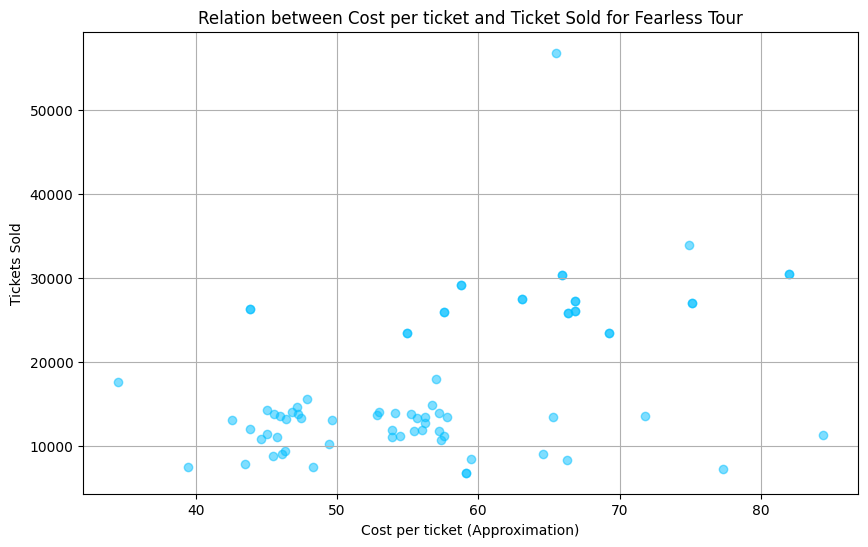

In [24]:
# Plotting to see the distribution of cost per ticket for Fearless Tour to get a range to impute 
ticket_sold = rev_cal["tickets_sold"]
cost_per_ticket = rev_cal['Cost_per_ticket']

plt.figure(figsize=(10,6))
plt.scatter(cost_per_ticket,ticket_sold,color='deepskyblue',alpha=0.5)
plt.xlabel('Cost per ticket (Approximation)')
plt.ylabel('Tickets Sold')
plt.title("Relation between Cost per ticket and Ticket Sold for Fearless Tour")
plt.grid(True)
plt

In [25]:
# Imputing Cost per ticket values and Calculating revenues for genuine values with the average cost per ticket for fearless tour and its ticket sold
gen1_val = df['Revenue']== 3
gen1_val 
gen1_idx = df[gen1_val].index
gen1_idx
for vals in gen1_idx:
    # Imputing Cost Per Ticket between a range 46 - 54
    df.at[vals,'Cost_per_ticket']= random.randint(46,54)
    df.at[vals,'Revenue'] = df.at[vals,'tickets_sold'] * df.at[vals,'Cost_per_ticket'] 
df.head()

,City,Country,Venue,tickets_sold,tickets_available,Revenue,Cost_per_ticket,Tour,Opening_act
0,Evansville,United States,Roberts Municipal Stadium,7463,7463,360617,48.320649,Fearless_Tour,"[Gloriana, Kellie Pickler]"
1,Jonesboro,United States,Convocation Center,7822,7822,340328,43.509077,Fearless_Tour,"[Gloriana, Kellie Pickler]"
2,St. Louis,United States,Scottrade Center,13764,13764,650420,47.255158,Fearless_Tour,"[Gloriana, Kellie Pickler]"
3,Alexandria,United States,Bishop Ireton High School,17032,17032,919728,54.000000,Fearless_Tour,"[Gloriana, Kellie Pickler]"
4,North Charleston,United States,North Charleston Coliseum,8751,8751,398154,45.498115,Fearless_Tour,"[Gloriana, Kellie Pickler]"


In [26]:
# Creating a dataframe copy without duplicate values
without_duplicates = df[df['tickets_sold'] != 0]
without_duplicates.shape
# This dataframe doesn,t have any duplicated value and can be used for calculation, the df dataframe with the original values is also needed as it gives info on nuber of events, etc.

(445, 9)

### Data Visualization

- Fearless Tour - 2009-10
- Speak Now World Tour - 2011-12
- The Red Tour - 2013-14
- The 1989 World Tour - 2015
- Reputation Tour - 2018

In [27]:
df['Tour'].value_counts()

Fearless_Tour              111
Speak_Now_World_Tour       110
The_Red_Tour                86
The_1989_World_Tour         85
Reputation_Stadium_Tour     53
Name: Tour, dtype: int64

<Axes: title={'center': 'Events per Tour'}, xlabel='No. of Events'>

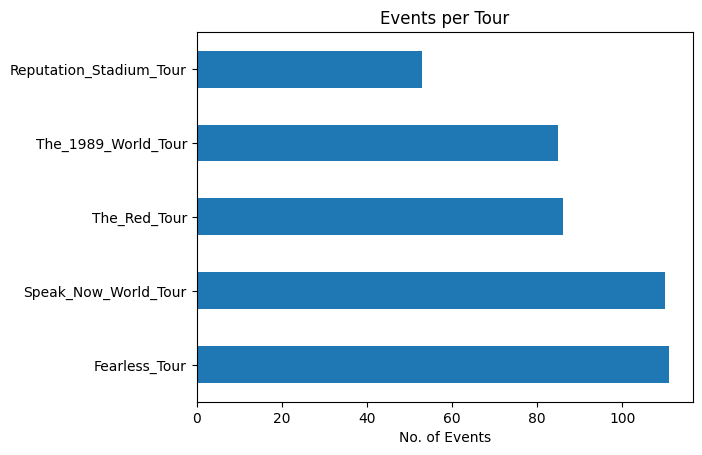

In [28]:
df['Tour'].value_counts().plot(kind='barh',title="Events per Tour",xlabel='No. of Events')